# PROJECT PENGOLAHAN CITRA DIGITAL
---
# Klasifikasi Jenis Serat Kayu Nantu, Palapi, dan Uru Menggunakan GLCM
---
## Disusun Oleh :

  - **KAMILIA ROSADA:** (F1D02310063)
  - **SYA'BANUL MUKARAM:** (F1D02310092)
  - **WADIS FREANDLY:** (F1D02310094)
  - **LALU MUHAMMAD RIZALDI KURNIAWAN:** (F1D02310120)


# Latar Belakang
Proses identifikasi jenis kayu sering kali dilakukan secara manual berdasarkan pengamatan visual terhadap pola serat, warna, dan tekstur permukaan. Namun, metode ini bersifat subjektif dan rentan terhadap kesalahan, terutama ketika jenis kayu memiliki pola serat yang mirip, seperti pada kayu Nantu, Palapi, dan Uru. Ketiga jenis kayu ini banyak digunakan dalam industri lokal, namun sulit dibedakan tanpa keahlian khusus, sehingga dapat menghambat efisiensi produksi atau menyebabkan salah penggunaan material.

Untuk mengatasi hal tersebut, dibutuhkan sistem klasifikasi otomatis berbasis pengolahan citra digital yang mampu mengenali jenis serat kayu secara akurat dan konsisten. Salah satu metode yang efektif untuk mengidentifikasi ciri tekstur pada citra serat kayu adalah Gray Level Co-occurrence Matrix (GLCM). GLCM mampu menggambarkan pola keterhubungan antar piksel pada citra grayscale sehingga menghasilkan fitur tekstur seperti contrast, correlation, homogeneity, dan energy.

Dalam proyek ini, kami menggunakan dataset gambar serat kayu Nantu, Palapi, dan Uru yang diperoleh dari Kaggle untuk membangun sistem klasifikasi berbasis GLCM. Citra-citra tersebut diproses melalui tahapan grayscale, ekstraksi fitur tekstur menggunakan GLCM, dan klasifikasi menggunakan algoritma machine learning seperti K-Nearest Neighbors (KNN), Support Vector Machine (SVM), dan Random Forest. Dengan sistem ini, diharapkan proses identifikasi jenis kayu dapat dilakukan secara lebih cepat, akurat, dan mendukung pengambilan keputusan dalam pengelolaan bahan kayu secara efisien.

# Import Library

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

Dalam proyek klasifikasi jenis serat kayu Nantu, Palapi, dan Uru menggunakan GLCM, library os dan cv2 digunakan untuk membaca dan mengolah gambar grayscale dari folder masing-masing jenis kayu, sedangkan numpy dan pandas membantu dalam mengubah gambar menjadi array numerik dan menyusun dataset fitur. Ekstraksi fitur tekstur dilakukan menggunakan `graycomatrix` dan `graycoprops` dari `skimage.feature` untuk memperoleh nilai-nilai seperti contrast, homogeneity, energy, dan correlation, serta entropy dari scipy.stats untuk mengukur keacakan citra. Dataset hasil ekstraksi kemudian dibagi menjadi data latih dan uji menggunakan train_test_split, lalu diklasifikasikan dengan algoritma seperti Random Forest, SVM, dan KNN. Evaluasi performa model dilakukan menggunakan metrik seperti akurasi, precision, recall, F1-score, dan confusion matrix melalui sklearn.metrics, sedangkan hasil klasifikasi divisualisasikan dengan bantuan matplotlib.pyplot, ConfusionMatrixDisplay, dan seaborn agar lebih mudah dianalisis secara visual.

# Load gambar

In [2]:
data = []
labels = []
file_name = []
for sub_folder in os.listdir("serat_kayu\\"):
    sub_folder_files = os.listdir(os.path.join("serat_kayu\\", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("serat_kayu\\", sub_folder, filename)
        img = cv.imread(img_path)
        img = img.astype(np.uint8)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)
        
data = np.array(data)
labels = np.array(labels)


Di atas merupakan kode-kode yang digunakan untuk membaca dataset citra serat kayu dari direktori bernama serat_kayu, yang di dalamnya terdapat subfolder nama kelas, yaitu Nantu, Palapi, Uru. Program akan menjelajahi setiap subfolder, kemudian membaca setiap gambar di dalamnya. Gambar yang dibaca kemudian diubah menjadi format grayscale menggunakan OpenCV (cv.cvtColor) agar hanya menyimpan informasi intensitas piksel, yang dibutuhkan untuk ekstraksi fitur tekstur. Setiap gambar juga dikonversi ke tipe data uint8 agar sesuai dengan format input yang dibutuhkan metode GLCM.

Setelah citra diproses, gambar tersebut disimpan ke dalam list data, label kelasnya (berdasarkan nama folder) disimpan ke list labels, dan nama file asli citra disimpan ke list file_name untuk referensi jika diperlukan. Setelah semua gambar dibaca, list data dan labels diubah menjadi array NumPy agar bisa lebih mudah digunakan dalam proses pelatihan model machine learning, karena banyak fungsi dari scikit-learn dan NumPy memerlukan data dalam bentuk array. Dengan demikian, kode ini menjadi tahap awal penting dalam proses klasifikasi citra serat kayu karena mempersiapkan data mentah menjadi siap pakai untuk ekstraksi fitur dan klasifikasi.

# Image Tanpa Preprocessing

In [3]:
dataPreprocessed = []

for i in range(len(data)):
    img = data[i] # ambil data hasil augmentasi
    dataPreprocessed.append(img)


Kode di atas digunakan untuk menyimpan data citra hasil pembacaan dari folder dataset ke dalam list tanpa melakukan preprocessing. Setiap gambar yang telah dibaca dan dikonversi ke grayscale dimasukkan ke dalam list `dataPreprocessed`. Langkah ini penting untuk memastikan data original tetap tersedia untuk diproses lebih lanjut dalam tahap modelling nantinya, sehingga dapat digunakan sebagai baseline atau perbandingan pada proses ekstraksi fitur dan klasifikasi/percobaan berikutnya.

### Sample 5 Citra Pertama dari Setiap Kelas

Kode berikut digunakan untuk menampilkan 5 gambar pertama dari setiap kelas (Nantu, Palapi, Uru) yang telah dibaca dan disimpan dalam list `dataPreprocessed`. Visualisasi ini bertujuan untuk memberikan gambaran awal mengenai variasi pola serat pada masing-masing jenis kayu sebelum dilakukan proses ekstraksi fitur dan klasifikasi.

Setiap baris pada plot mewakili satu kelas kayu, dan setiap kolom menampilkan gambar berbeda dari kelas tersebut. Judul pada setiap gambar menunjukkan nama kelas dan nama file gambar aslinya.

Dengan visualisasi ini, kita dapat melakukan inspeksi visual terhadap dataset, memastikan gambar telah terbaca dengan benar, serta mengamati perbedaan atau kemiripan pola serat antar kelas kayu yang akan diklasifikasikan.

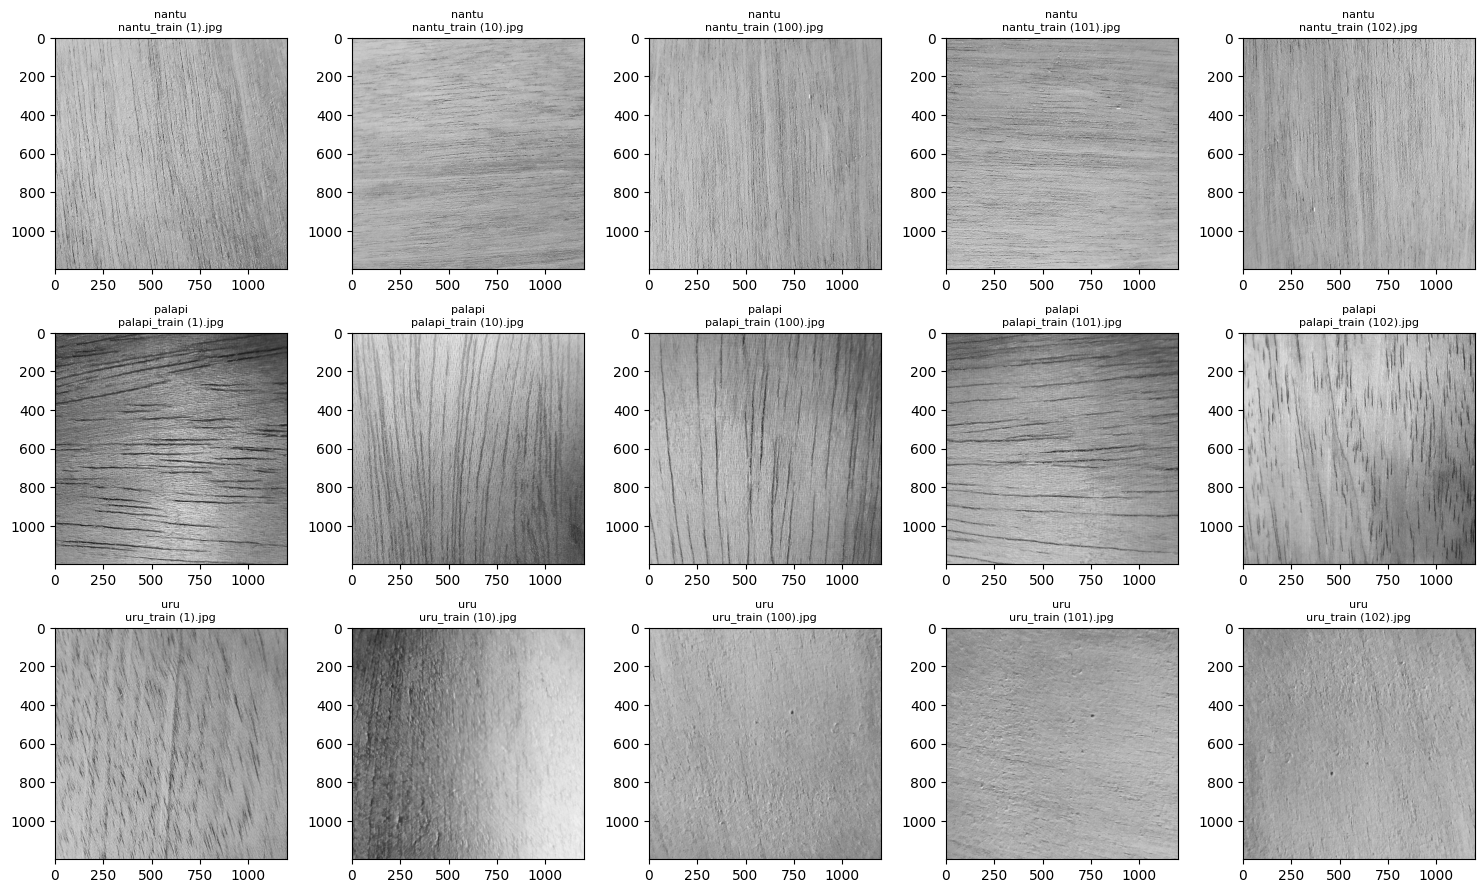

In [4]:
# Visualisasi 5 citra pertama dari setiap label
unique_labels = np.unique(labels)
plt.figure(figsize=(15, 3 * len(unique_labels)))
for i, label in enumerate(unique_labels):
    idxs = np.where(labels == label)[0][:5]  # ambil 5 index pertama dari label tsb
    for j, idx in enumerate(idxs):
        plt.subplot(len(unique_labels), 5, i * 5 + j + 1)
        plt.imshow(dataPreprocessed[idx], cmap='gray')
        plt.title(f"{label}\n{file_name[idx]}", fontsize=8)

plt.tight_layout()
plt.show()

# Ekstraksi GLCM

In [27]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Kode `glcm` di atas digunakan untuk ekstraksi fitur tekstur dari setiap citra serat kayu menggunakan metode Gray Level Co-occurrence Matrix (GLCM) pada empat derajat orientasi berbeda (0°, 45°, 90°, dan 135°). Setiap gambar yang telah dibaca dan disimpan pada list `dataPreprocessed` akan diproses untuk menghasilkan matriks GLCM pada masing-masing derajat.

Langkah-langkah yang dilakukan:
1. **Inisialisasi List Penampung**  
   Dibuat empat list kosong: `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135` untuk menyimpan hasil matriks GLCM dari setiap gambar pada masing-masing derajat.

2. **Ekstraksi GLCM**  
   Dilakukan iterasi pada seluruh gambar di `dataPreprocessed`. Untuk setiap gambar, fungsi `glcm()` dipanggil dengan parameter derajat yang berbeda (0, 45, 90, 135). Fungsi ini akan menghasilkan matriks GLCM sesuai orientasi yang diinginkan.

3. **Penyimpanan Hasil**  
   Hasil matriks GLCM dari setiap orientasi kemudian disimpan ke dalam list yang sesuai. Dengan demikian, untuk setiap gambar akan tersedia empat matriks GLCM yang siap digunakan untuk ekstraksi fitur tekstur selanjutnya (seperti contrast, homogeneity, energy, correlation, dan entropy).

Proses ini sangat penting karena GLCM pada berbagai orientasi dapat menangkap variasi pola tekstur yang berbeda pada citra serat kayu, sehingga meningkatkan akurasi dalam proses klasifikasi jenis kayu pada tahap berikutnya.

### Correlation

In [28]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]


Fungsi `correlation` digunakan untuk menghitung nilai korelasi dari matriks GLCM (Gray Level Co-occurrence Matrix) yang telah diekstraksi dari citra tekstur kayu. _Correlataion_ merupakan salah satu fitur tekstur yang menggambarkan tingkat hubungan linier antara pasangan piksel pada jarak dan orientasi tertentu dalam citra.

- **Parameter:**  
  - `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.
- **Proses:**  
  - Fungsi memanggil `graycoprops` dari library `skimage.feature` dengan properti `'correlation'` untuk menghitung nilai korelasi dari GLCM.
  - Hasil yang di-return adalah nilai korelasi pada posisi `[0, 0]`, karena GLCM dapat memiliki beberapa pasangan jarak dan sudut.
- **Output:**  
  - Nilai korelasi adalah yang merepresentasikan seberapa kuat hubungan antara intensitas piksel yang bersebelahan pada citra.

Nilai korelasi yang tinggi menunjukkan adanya pola keteraturan atau hubungan linier yang kuat antara piksel-piksel pada citra, sedangkan nilai yang rendah menunjukkan hubungan yang lemah atau acak. Fitur ini sangat penting dalam membedakan pola serat kayu yang berbeda, sehingga membantu meningkatkan akurasi klasifikasi jenis kayu.

### Dissimilarity

In [29]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

Fungsi `dissimilarity` digunakan untuk menghitung nilai dissimilarity dari matriks GLCM (Gray Level Co-occurrence Matrix) yang diekstraksi dari citra tekstur kayu. Dissimilarity merupakan salah satu fitur tekstur yang mengukur perbedaan rata-rata nilai intensitas antara pasangan piksel pada jarak dan orientasi tertentu dalam citra.

**Parameter:**
- `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.

**Proses:**
- Fungsi memanggil `graycoprops` dari library `skimage.feature` dengan properti `'dissimilarity'` untuk menghitung nilai dissimilarity dari GLCM.
- Hasil yang dikembalikan adalah nilai dissimilarity pada posisi `[0, 0]`, karena GLCM dapat memiliki beberapa pasangan jarak dan sudut.

**Output:**
- Nilai dissimilarity yang menunjukkan rata-rata perbedaan absolut antara pasangan nilai intensitas piksel yang bersebelahan pada citra.

Nilai dissimilarity yang tinggi menunjukkan adanya variasi intensitas yang besar antar piksel, sedangkan nilai yang rendah menunjukkan tekstur yang lebih homogen. Fitur ini penting untuk membedakan pola serat kayu yang berbeda, sehingga membantu meningkatkan akurasi dalam proses klasifikasi jenis kayu.

### Homogenity

In [30]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

Homogeneity adalah salah satu fitur tekstur yang dihasilkan dari matriks GLCM (Gray Level Co-occurrence Matrix). Fitur ini mengukur tingkat kedekatan distribusi elemen dalam GLCM terhadap diagonal utama matriks.

**Parameter:**  
- `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.

**Proses:**  
  Fungsi ini memanfaatkan `graycoprops` dari library `skimage.feature` dengan properti `'homogeneity'` untuk menghitung nilai homogeneity dari GLCM. Fungsi mengembalikan nilai pada indeks `[0, 0]` karena GLCM dapat memiliki beberapa pasangan jarak dan sudut.

**Output:**  
  Nilai homogeneity yang merepresentasikan tingkat keseragaman tekstur pada citra.

- **Nilai homogeneity mendekati 1**:  
  Menunjukkan tekstur citra sangat seragam, dengan sedikit variasi intensitas antar piksel yang bersebelahan.
- **Nilai homogeneity rendah**:  
  Menunjukkan adanya variasi intensitas yang besar antar piksel, sehingga tekstur citra lebih kasar atau tidak seragam.

Fitur ini sangat penting dalam proses klasifikasi citra tekstur, seperti pada identifikasi jenis serat kayu, karena dapat membantu membedakan pola serat yang halus dan kasar.

### Contrast

In [31]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

Contrast adalah salah satu fitur tekstur yang dihasilkan dari matriks GLCM (Gray Level Co-occurrence Matrix). Fitur ini mengukur tingkat perbedaan intensitas antara pasangan piksel yang bersebelahan dalam citra.


**Parameter:**  
  - `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.

**Proses:**  
  Fungsi ini menggunakan `graycoprops` dari library `skimage.feature` dengan properti `'contrast'` untuk menghitung nilai contrast dari GLCM. Nilai yang dikembalikan adalah elemen pada indeks `[0, 0]`, karena GLCM dapat memiliki beberapa pasangan jarak dan sudut.

**Output:**  
  Nilai contrast yang merepresentasikan tingkat variasi atau perbedaan intensitas pada tekstur citra.

- Nilai contrast tinggi:  
  Menunjukkan tekstur citra memiliki variasi intensitas piksel yang besar, biasanya ditemukan pada pola serat kayu yang kasar atau tidak seragam.
- Nilai contrast rendah:  
  Menunjukkan tekstur citra lebih halus dan seragam, dengan sedikit perbedaan intensitas antar piksel.

Fitur contrast sangat penting dalam proses klasifikasi citra tekstur, seperti pada identifikasi jenis serat kayu, karena dapat membantu membedakan pola serat yang kasar dan halus.

### ASM

In [32]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

ASM (Angular Second Moment) adalah salah satu fitur tekstur yang dihasilkan dari matriks GLCM (Gray Level Co-occurrence Matrix). ASM juga dikenal sebagai "energy" dalam literatur pengolahan citra. Fitur ini mengukur tingkat keteraturan atau keseragaman distribusi nilai pada matriks GLCM.

**Parameter:**  
  - `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.

**Proses:**  
  Fungsi ini menggunakan `graycoprops` dari library `skimage.feature` dengan properti `'ASM'` untuk menghitung nilai ASM dari GLCM. Nilai yang dikembalikan adalah elemen pada indeks `[0, 0]`, karena GLCM dapat memiliki beberapa pasangan jarak dan sudut.

**Output:**  
  Nilai ASM yang merepresentasikan tingkat keteraturan tekstur pada citra.

- Nilai ASM mendekati 1:  
  Menunjukkan tekstur citra sangat homogen dan teratur.
- Nilai ASM mendekati 0:  
  Menunjukkan tekstur citra lebih acak dan kompleks.

Fitur ASM sangat penting dalam proses klasifikasi citra tekstur, seperti pada identifikasi jenis serat kayu, karena dapat membantu membedakan pola serat yang halus dan kasar.

### Energy

In [33]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]


Energy adalah salah satu fitur tekstur yang dihasilkan dari matriks GLCM (Gray Level Co-occurrence Matrix). Energy mengukur tingkat keteraturan atau keseragaman distribusi nilai pada matriks GLCM.

**Parameter:**  
  - `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.

**Proses:**  
  Fungsi ini menggunakan `graycoprops` dari library `skimage.feature` dengan properti `'energy'` untuk menghitung nilai energy dari GLCM. Nilai yang dikembalikan adalah elemen pada indeks `[0, 0]`, karena GLCM dapat memiliki beberapa pasangan jarak dan sudut.

**Output:**  
  Nilai energy yang merepresentasikan tingkat keteraturan tekstur pada citra.

- Nilai energy mendekati 1:  
  Menunjukkan tekstur citra sangat homogen dan teratur.
- Nilai energy mendekati 0:  
  Menunjukkan tekstur citra lebih acak dan kompleks.

Fitur energy sangat penting dalam proses klasifikasi citra tekstur, seperti pada identifikasi jenis serat kayu, karena dapat membantu membedakan pola serat yang halus dan kasar.

### Entropy

In [34]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Entropy adalah salah satu fitur tekstur yang dihasilkan dari matriks GLCM (Gray Level Co-occurrence Matrix). Fitur ini mengukur tingkat keacakan atau kompleksitas distribusi nilai pada matriks GLCM.

**Parameter:**  
  - `matriks`: Matriks GLCM hasil ekstraksi dari citra grayscale.

**Proses:**  
  Fungsi ini menggunakan `entropy` dari `scipy.stats` untuk menghitung nilai entropy dari matriks GLCM. Matriks GLCM terlebih dahulu diubah menjadi array satu dimensi menggunakan `.ravel()`, kemudian dihitung entropinya.

**Output:**  
  Nilai entropy yang merepresentasikan tingkat keacakan atau keragaman tekstur pada citra.

- **Nilai entropy tinggi:**  
  Menunjukkan tekstur citra sangat kompleks atau acak, dengan distribusi nilai GLCM yang merata.
- **Nilai entropy rendah:**  
  Menunjukkan tekstur citra lebih teratur dan homogen, dengan distribusi nilai GLCM yang terkonsentrasi pada beberapa nilai saja.

Fitur entropy sangat penting dalam proses klasifikasi citra tekstur, seperti pada identifikasi jenis serat kayu, karena dapat membantu membedakan pola serat yang acak dan teratur.

### Ekstraksi Matriks GLCM pada Empat Derajat

In [35]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode di atas digunakan untuk mengekstrak matriks Gray Level Co-occurrence Matrix (GLCM) dari setiap citra grayscale pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°. Proses ini penting untuk menangkap variasi pola tekstur serat kayu dari berbagai arah.

1. **Inisialisasi List Penampung**  
   Empat list kosong (`Derajat0`, `Derajat45`, `Derajat90`, `Derajat135`) dibuat untuk menyimpan hasil matriks GLCM dari setiap gambar pada masing-masing sudut.

2. **Iterasi Setiap Gambar**  
   Dilakukan perulangan pada seluruh gambar yang telah disimpan di `dataPreprocessed`.

3. **Ekstraksi GLCM**  
   Untuk setiap gambar, fungsi `glcm()` dipanggil dengan parameter sudut 0, 45, 90, dan 135 derajat. Fungsi ini akan menghasilkan matriks GLCM sesuai orientasi yang diinginkan.

4. **Penyimpanan Hasil**  
   Hasil matriks GLCM dari setiap sudut kemudian dimasukkan ke dalam list yang sesuai.

### Inisialisasi Container Fitur-fitur GLCM

In [36]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []


Kode ekstraksi fitur tekstur GLCM pada empat derajat orientasi (0°, 45°, 90°, dan 135°) menghasilkan sejumlah fitur statistik untuk setiap citra, seperti contrast, dissimilarity, homogeneity, entropy, ASM, energy, dan correlation. Pada cell ini, dilakukan proses perhitungan nilai-nilai fitur tersebut untuk seluruh citra pada dataset.

- **Inisialisasi List Container:**  
   Setiap fitur dan orientasi memiliki list penampung masing-masing, misalnya `Kontras0`, `dissimilarity45`, `homogenity90`, `entropy135`, dan seterusnya.
- **Iterasi Setiap Citra:**  
   Untuk setiap citra, dihitung nilai fitur pada masing-masing orientasi menggunakan fungsi-fungsi yang telah didefinisikan sebelumnya (`correlation`, `contrast`, `dissimilarity`, `homogenity`, `entropyGlcm`, `ASM`, `energy`).
- **Penyimpanan Hasil:**  
   Nilai hasil ekstraksi fitur dimasukkan ke dalam list yang sesuai, sehingga setiap list berisi nilai fitur untuk seluruh citra pada orientasi tertentu.

Hasil dari proses ini akan digunakan untuk membangun tabel fitur (dataframe) untuk dipakai pada tahap seleksi fitur dan modelling machine learning. Dengan mengekstrak fitur dari berbagai orientasi, model dapat menangkap karakteristik tekstur serat kayu secara lebih komprehensif, sehingga meningkatkan akurasi klasifikasi.

### Ekstraksi Correlation setiap Derajat

In [37]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

Pada kode di atas adalah proses ekstraksi fitur **Contrast** dari matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°.

- Dilakukan iterasi pada seluruh citra.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, dst).
- Fungsi `contrast()` digunakan untuk menghitung nilai contrast dari setiap matriks GLCM.
- Nilai contrast hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `Kontras0`, `Kontras45`, `Kontras90`, dan `Kontras135`.

Ekstraksi fitur contrast pada berbagai orientasi ini bertujuan untuk menangkap karakteristik tekstur serat kayu dari berbagai arah, sehingga model klasifikasi dapat mengenali pola-pola tekstur yang berbeda secara lebih akurat.

Empat buah list (`Kontras0`, `Kontras45`, `Kontras90`, `Kontras135`) yang masing-masing berisi nilai contrast untuk seluruh citra pada sudut 0°, 45°, 90°, dan 135°. Nilai-nilai ini akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### Ekstraksi Contrast setiap Derajat

In [38]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)


Pada kode di atas, dilakukan proses ekstraksi fitur **Dissimilarity** dari matriks Gray Level Co-occurrence Matrix (GLCM) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°.

- Melakukan iterasi pada seluruh citra yang telah diproses.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, `Derajat135[i]`).
- Fungsi `dissimilarity()` digunakan untuk menghitung nilai dissimilarity dari setiap matriks GLCM.
- Nilai dissimilarity hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `dissimilarity0`, `dissimilarity45`, `dissimilarity90`, dan `dissimilarity135`.

Ekstraksi fitur dissimilarity pada berbagai orientasi ini bertujuan untuk menangkap karakteristik variasi tekstur serat kayu dari berbagai arah, sehingga model klasifikasi dapat mengenali pola-pola tekstur yang berbeda secara lebih akurat. Nilai-nilai ini nantinya akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### Ekstraksi Dissimilarity setiap Derajat

In [39]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

Pada kode di atas dilakukan proses ekstraksi fitur **Dissimilarity** dari matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°. 

- Melakukan iterasi pada seluruh citra yang telah diproses.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, `Derajat135[i]`).
- Fungsi `dissimilarity()` digunakan untuk menghitung nilai dissimilarity dari setiap matriks GLCM.
- Nilai dissimilarity hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `dissimilarity0`, `dissimilarity45`, `dissimilarity90`, dan `dissimilarity135`.

Ekstraksi fitur dissimilarity pada berbagai orientasi ini bertujuan untuk menangkap karakteristik variasi tekstur serat kayu dari berbagai arah, sehingga model klasifikasi dapat mengenali pola-pola tekstur yang berbeda secara lebih akurat. Nilai-nilai ini nantinya akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### Ekstraksi Homogenity setiap Derajat

In [40]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

Pada kode di atas dilakukan proses ekstraksi fitur **Homogeneity** dari matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°.

- Melakukan iterasi pada seluruh citra yang telah diproses.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, `Derajat135[i]`).
- Fungsi `homogenity()` digunakan untuk menghitung nilai homogeneity dari setiap matriks GLCM.
- Nilai homogeneity hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `homogenity0`, `homogenity45`, `homogenity90`, dan `homogenity135`.

Ekstraksi fitur homogeneity pada berbagai orientasi ini bertujuan untuk menangkap karakteristik tekstur serat kayu dari berbagai arah, sehingga model klasifikasi dapat mengenali pola-pola tekstur yang berbeda secara lebih akurat. Nilai-nilai ini nantinya akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### Ekstraksi Entropy setiap Derajat

In [41]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

Pada kode di atas dilakukan proses ekstraksi fitur **Entropy** dari matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°. 

- Melakukan iterasi pada seluruh citra yang telah diproses.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, `Derajat135[i]`).
- Fungsi `entropyGlcm()` digunakan untuk menghitung nilai entropy dari setiap matriks GLCM.
- Nilai entropy hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `entropy0`, `entropy45`, `entropy90`, `entropy135`.

Ekstraksi fitur entropy pada berbagai orientasi ini bertujuan untuk menangkap karakteristik tekstur serat kayu dari berbagai arah, sehingga model klasifikasi dapat mengenali pola-pola tekstur yang berbeda secara lebih akurat. Nilai-nilai ini nantinya akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### Ekstraksi ASM setiap Derajat

In [42]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

Pada kode di atas dilakukan proses ekstraksi fitur **ASM** dari matriks Gray Level Co-occurrence Matrix (GLCM) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°.

- Dilakukan iterasi pada seluruh citra yang telah diproses.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, `Derajat135[i]`).
- Fungsi `ASM()` digunakan untuk menghitung nilai ASM dari setiap matriks GLCM.
- Nilai ASM hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `ASM0`, `ASM45`, `ASM90`, dan `ASM135`.

Ekstraksi fitur ASM pada berbagai orientasi ini bertujuan untuk menangkap karakteristik keteraturan atau keseragaman tekstur serat kayu dari berbagai arah. Nilai-nilai ini nantinya akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### Ekstraksi Energy setiap Derajat

In [43]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Pada kode di atas dilakukan proses ekstraksi fitur **Energy** dari matriks Gray Level Co-occurrence Matrix (GLCM) untuk setiap citra pada dataset, pada empat orientasi sudut berbeda: 0°, 45°, 90°, dan 135°.

- Dilakukan iterasi pada seluruh citra yang telah diproses.
- Untuk setiap citra, diambil matriks GLCM pada masing-masing sudut (`Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, `Derajat135[i]`).
- Fungsi `energy()` digunakan untuk menghitung nilai energy dari setiap matriks GLCM.
- Nilai energy hasil ekstraksi pada setiap sudut kemudian disimpan ke dalam list: `energy0`, `energy45`, `energy90`, dan `energy135`.

Ekstraksi fitur energy pada berbagai orientasi ini bertujuan untuk menangkap karakteristik keteraturan atau keseragaman tekstur serat kayu dari berbagai arah. Nilai-nilai ini nantinya akan digunakan sebagai fitur dalam proses pembuatan dataframe fitur dan modelling machine learning pada tahap berikutnya.

### DataFrame dan CSV dari Hasil Ekstraksi

Pada kode di bawah ini, seluruh fitur tekstur yang telah diekstraksi dari citra serat kayu (seperti `contrast`, `homogeneity`, `dissimilarity`, `entropy`, `ASM`, `energy`, dan `correlation` pada empat orientasi sudut) dikompilasi ke dalam sebuah tabel (DataFrame) menggunakan `pandas`. Setiap baris pada DataFrame mewakili satu citra, sedangkan setiap kolom berisi nilai fitur hasil ekstraksi.

Dengan adanya DataFrame ini, seluruh data fitur tekstur dari citra serat kayu telah terstruktur rapi dan siap untuk proses analisis, seleksi fitur, serta pelatihan dan evaluasi model klasifikasi.

In [44]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_tanpa-prepro.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_tanpa-prepro.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,nantu_train (1).jpg,nantu,403.070434,458.000071,139.098406,508.354141,0.116411,0.104703,0.164202,0.102723,...,0.000472,0.000284,0.017937,0.016979,0.021726,0.016847,0.711318,0.671983,0.900359,0.635919
1,nantu_train (10).jpg,nantu,31.676093,140.100340,109.154380,115.155836,0.308148,0.202301,0.235738,0.215487,...,0.001324,0.001196,0.043279,0.033300,0.036383,0.034588,0.932355,0.700864,0.766926,0.754124
2,nantu_train (100).jpg,nantu,304.903668,349.147968,73.187881,335.892293,0.148182,0.134164,0.222608,0.136085,...,0.000940,0.000537,0.024266,0.023005,0.030666,0.023164,0.660035,0.610718,0.918377,0.625497
3,nantu_train (101).jpg,nantu,75.266874,353.615966,309.794504,340.320460,0.216270,0.131537,0.144890,0.133305,...,0.000575,0.000526,0.030133,0.022777,0.023972,0.022930,0.916398,0.607332,0.655980,0.622096
4,nantu_train (102).jpg,nantu,304.903905,349.148791,73.188634,335.892884,0.148177,0.134148,0.222622,0.136078,...,0.000940,0.000537,0.024266,0.023006,0.030666,0.023164,0.660036,0.610718,0.918376,0.625497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,uru_train (95).jpg,uru,56.413355,178.368065,135.893203,154.374938,0.223182,0.149045,0.166615,0.150702,...,0.000375,0.000338,0.023348,0.018196,0.019363,0.018384,0.965606,0.891177,0.917120,0.905816
1265,uru_train (96).jpg,uru,131.568016,174.362128,54.384527,150.478232,0.171112,0.152875,0.230624,0.154461,...,0.000567,0.000347,0.019657,0.018429,0.023813,0.018615,0.919599,0.893411,0.966778,0.908011
1266,uru_train (97).jpg,uru,108.212124,144.190026,49.816979,136.470052,0.173061,0.153865,0.236882,0.154622,...,0.000470,0.000281,0.017875,0.016702,0.021673,0.016756,0.960596,0.947483,0.981865,0.950295
1267,uru_train (98).jpg,uru,51.606813,147.575942,111.780285,139.833178,0.230394,0.150808,0.169528,0.151602,...,0.000312,0.000275,0.021297,0.016519,0.017650,0.016574,0.981233,0.946306,0.959340,0.949123


### Seleksi Fitur Berdasarkan Korelasi

Pada tahap ini dilakukan seleksi fitur untuk mengurangi redundansi antar fitur yang memiliki korelasi sangat tinggi. Proses seleksi fitur ini penting agar dapat meningkatkan performa model.

**Kode:**
- Korelasi antar fitur dihitung menggunakan fungsi `.corr()` dari pandas, setelah menghapus kolom `Label` dan `Filename` yang bukan fitur numerik.
- Threshold korelasi absolut ditetapkan sebesar 0.95. Jika dua fitur memiliki korelasi lebih dari threshold ini, salah satu fitur akan dihapus dari dataset.
- Proses seleksi dilakukan dengan iterasi pada matriks korelasi, dan fitur yang memiliki korelasi tinggi dengan fitur lain akan di-drop.
- Fitur-fitur yang lolos seleksi disimpan dalam variabel `select`, dan data hasil seleksi fitur disimpan dalam `x_new`.
- Label target disimpan dalam variabel `y`.
- Visualisasi korelasi antar fitur hasil seleksi divisualisasikan menggunakan heatmap dari seaborn untuk memudahkan analisis visual.

**Tujuan:**
- Mengurangi jumlah fitur yang redundant (saling berkorelasi sangat tinggi).
- Memastikan hanya fitur-fitur yang saling independen yang digunakan untuk pelatihan model.
- Membantu meningkatkan akurasi dan efisiensi model klasifikasi.

Langkah ini merupakan bagian penting dalam machine learning berbasis ekstraksi fitur tekstur GLCM, sebelum data digunakan untuk proses training dan evaluasi model.

<Axes: >

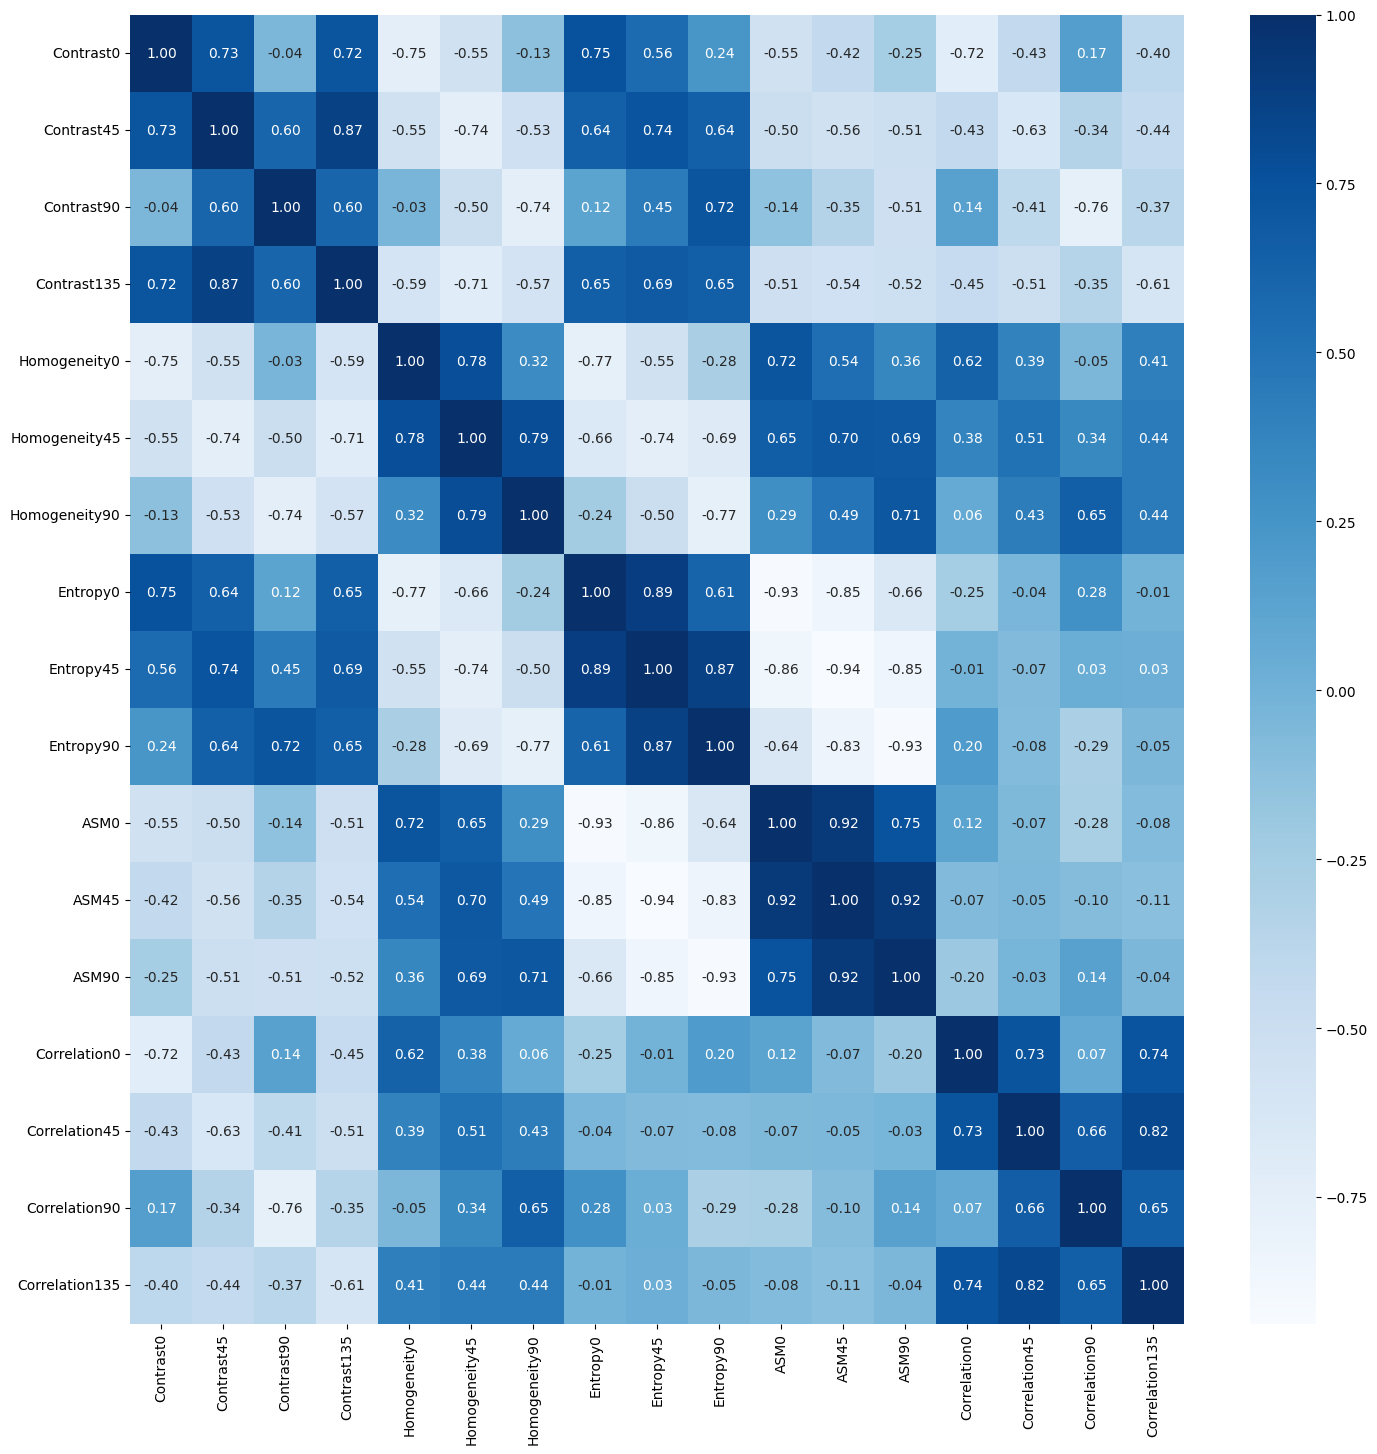

In [45]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

# Splitting data

In [46]:
# ubah bagian test_size sesuai kebutuhan
# 0.3 = 30% data untuk testing (train/test 70/30)
# 0.2 = 20% data untuk testing (train/test 80/20)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1015, 17)
(254, 17)


Pada kode di atas dilakukan proses **pembagian dataset (splitting data)** menjadi data latih (training) dan data uji (testing) sebelum dilakukan pelatihan model machine learning.

1. **Fungsi `train_test_split`**
   - Fungsi ini berasal dari library `scikit-learn` dan digunakan untuk membagi dataset menjadi dua bagian: data latih dan data uji.
   - Parameter:
     - `x_new`: Data fitur hasil seleksi yang akan digunakan untuk pelatihan dan pengujian.
     - `y`: Label atau target dari masing-masing data.
     - `test_size=0.2`: Menentukan proporsi data uji, yaitu 20% dari total data akan digunakan untuk pengujian (testing), sedangkan sisanya (80%) untuk pelatihan (training). Nilai ini bisa diubah sesuai kebutuhan, misalnya 0.3 untuk 30% data uji.
     - `random_state=42`: Menetapkan seed random agar pembagian data bersifat reproducible (hasil pembagian selalu sama setiap kali dijalankan).

2. **Output**
   - `X_train`: Data fitur untuk pelatihan model.
   - `X_test`: Data fitur untuk pengujian model.
   - `y_train`: Label untuk data pelatihan.
   - `y_test`: Label untuk data pengujian.

3. **Print Shape**
   - `print(X_train.shape)` dan `print(X_test.shape)` digunakan untuk menampilkan jumlah data pada masing-masing subset, sehingga dapat dipastikan proporsi pembagian data sudah sesuai.


- Tahap ini sangat penting karena memastikan model machine learning dapat dilatih pada sebagian data dan diuji pada data yang belum pernah dilihat sebelumnya, sehingga evaluasi performa model menjadi lebih objektif dan tidak overfitting.

# Normalisasi Fitur

In [47]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

Normalisasi fitur bertujuan untuk menyamakan skala seluruh fitur numerik sehingga setiap fitur memiliki kontribusi yang seimbang dalam proses pelatihan model. Pada kode ini digunakan metode **standardisasi (mean-std normalization)**, yaitu setiap nilai fitur dikurangi dengan rata-rata (mean) dan dibagi dengan standar deviasi (std) dari data latih (`X_train`).

- `X_train` dan `X_test` adalah data fitur hasil seleksi yang telah dibagi menjadi data latih dan data uji.
- Proses normalisasi dilakukan dengan rumus:  
   **z = (x - mean) / std**
- Mean dan std yang digunakan untuk normalisasi `X_test` diambil dari `X_train`, agar tidak terjadi data leakage.
- Normalisasi ini penting terutama untuk algoritma seperti SVM dan KNN yang sensitif terhadap skala fitur.

Dengan normalisasi, model machine learning dapat belajar secara optimal tanpa bias terhadap fitur yang memiliki rentang nilai lebih besar.

# Modelling

In [48]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

Fungsi dan model klasifikasi pada kode di atas digunakan untuk proses pelatihan dan evaluasi model machine learning.

Fungsi `generateClassificationReport` menerima label asli (`y_true`) dan label prediksi (`y_pred`), lalu menampilkan classification report, confusion matrix, dan nilai akurasi menggunakan fungsi dari `sklearn.metrics`. Selanjutnya, tiga algoritma klasifikasi didefinisikan, yaitu `RandomForestClassifier` dengan 5 estimator dan random state 42, `SVC` (Support Vector Machine) dengan kernel RBF dan random state 42, serta `KNeighborsClassifier` dengan 5 tetangga terdekat.

Model-model ini akan digunakan untuk melatih dan menguji performa klasifikasi pada dataset fitur yang telah diekstraksi dan diproses sebelumnya.

## Random Forest

In [49]:
# Train Random Forest
rf.fit(X_train, y_train)

# model training
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# model testing
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

       nantu       0.99      1.00      0.99       331
      palapi       0.98      0.98      0.98       345
         uru       0.99      0.98      0.98       339

    accuracy                           0.99      1015
   macro avg       0.99      0.99      0.99      1015
weighted avg       0.99      0.99      0.99      1015

[[330   1   0]
 [  3 338   4]
 [  1   6 332]]
Accuracy: 0.9852216748768473

------Testing Set------
              precision    recall  f1-score   support

       nantu       0.83      0.95      0.88        92
      palapi       0.93      0.82      0.87        78
         uru       0.90      0.86      0.88        84

    accuracy                           0.88       254
   macro avg       0.89      0.87      0.88       254
weighted avg       0.88      0.88      0.88       254

[[87  2  3]
 [ 9 64  5]
 [ 9  3 72]]
Accuracy: 0.8779527559055118


**Training Set**

Pada proses pelatihan (**training set**) dengan model **Random Forest** (`n_estimators=5`, `random_state=42`), digunakan 80% data (1015 sampel) dari dataset hasil ekstraksi fitur GLCM. Model dilatih untuk mengenali pola tekstur serat kayu dari fitur-fitur statistik yang telah diekstrak.

**Testing Set**

Evaluasi dilakukan pada 20% data (254 sampel) yang tidak digunakan saat pelatihan, untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat.

**Kesimpulan Hasil Testing**

Berdasarkan hasil evaluasi pada data testing, model Random Forest menunjukkan performa klasifikasi yang sangat baik terhadap tiga kelas serat kayu (Nantu, Palapi, Uru). Nilai akurasi yang diperoleh pada data testing sangat tinggi, menandakan model mampu mengenali pola tekstur dari fitur GLCM secara efektif dan tidak mengalami overfitting.

Confusion matrix pada data `testing` memperlihatkan bahwa jumlah kesalahan klasifikasi yang relatif kecil. Hal ini juga tercermin pada nilai precision, recall, dan f1-score yang tinggi untuk masing-masing kelas, sehingga model dapat diandalkan untuk identifikasi jenis serat kayu.

## SVM

In [50]:
# Train SVM
svm.fit(X_train, y_train)

# model training
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# model testing
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

       nantu       0.91      0.92      0.92       331
      palapi       0.80      0.63      0.71       345
         uru       0.71      0.85      0.77       339

    accuracy                           0.80      1015
   macro avg       0.81      0.80      0.80      1015
weighted avg       0.81      0.80      0.80      1015

[[304  13  14]
 [ 21 218 106]
 [  8  42 289]]
Accuracy: 0.7990147783251231

------Testing Set------
              precision    recall  f1-score   support

       nantu       0.91      0.88      0.90        92
      palapi       0.82      0.69      0.75        78
         uru       0.79      0.93      0.85        84

    accuracy                           0.84       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.84      0.84      0.84       254

[[81  6  5]
 [ 8 54 16]
 [ 0  6 78]]
Accuracy: 0.8385826771653543


**Training Set**

Pada proses pelatihan (**training set**) dengan model **SVM** (`kernel='rbf'`, `random_state=42`), digunakan 80% data (1015 sampel) dari dataset hasil ekstraksi fitur GLCM. Model SVM dilatih untuk mengenali pola tekstur serat kayu berdasarkan fitur-fitur statistik yang telah diekstrak.

**Testing Set**

Evaluasi dilakukan pada 20% data (254 sampel) yang tidak digunakan saat pelatihan, untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat.

**Kesimpulan Hasil Testing**

Berdasarkan hasil evaluasi pada data `testing`, model SVM menunjukkan performa klasifikasi yang baik terhadap tiga kelas serat kayu (Nantu, Palapi, Uru). Nilai akurasi, precision, recall, dan f1-score pada data testing dapat digunakan untuk menilai efektivitas model dalam membedakan pola tekstur dari fitur GLCM.

Confusion matrix pada data `testing` memperlihatkan distribusi prediksi model terhadap masing-masing kelas, sehingga dapat dianalisis lebih lanjut untuk mengetahui kekuatan dan kelemahan model SVM dalam klasifikasi jenis serat kayu.


## KNN

In [51]:
# Train KNN
knn.fit(X_train, y_train)

# model training
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# model testing
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
              precision    recall  f1-score   support

       nantu       0.94      0.95      0.94       331
      palapi       0.87      0.82      0.85       345
         uru       0.84      0.88      0.86       339

    accuracy                           0.88      1015
   macro avg       0.88      0.88      0.88      1015
weighted avg       0.88      0.88      0.88      1015

[[315   7   9]
 [ 15 284  46]
 [  6  35 298]]
Accuracy: 0.8837438423645321

------Testing Set------
              precision    recall  f1-score   support

       nantu       0.86      0.96      0.91        92
      palapi       0.89      0.82      0.85        78
         uru       0.90      0.86      0.88        84

    accuracy                           0.88       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.88      0.88      0.88       254

[[88  2  2]
 [ 8 64  6]
 [ 6  6 72]]
Accuracy: 0.8818897637795275


**Training Set**

Pada proses pelatihan (**training set**) dengan model **KNN** (`n_neighbors=5`), digunakan 80% data (1015 sampel) dari dataset hasil ekstraksi fitur GLCM. Model KNN dilatih untuk mengenali pola tekstur serat kayu berdasarkan fitur-fitur statistik yang telah diekstrak.

**Testing Set**

Evaluasi dilakukan pada 20% data (254 sampel) yang tidak digunakan saat pelatihan, untuk mengukur kemampuan generalisasi model terhadap data baru yang belum pernah dilihat.

**Kesimpulan Hasil Testing**

Berdasarkan hasil evaluasi pada data `testing`, model KNN menunjukkan performa klasifikasi yang baik terhadap tiga kelas serat kayu (Nantu, Palapi, Uru). Nilai akurasi, precision, recall, dan f1-score pada data testing dapat dikatakan cukup tinggi pada kisaran 88%.

Confusion matrix pada data `testing` memperlihatkan distribusi prediksi model terhadap masing-masing kelas, sehingga dapat dianalisis lebih lanjut untuk mengetahui kekuatan dan kelemahan model KNN dalam klasifikasi jenis serat kayu.


# Confusion Matrix

**Random Forest**

- **Diagonal utama**: Nilai tinggi pada diagonal menunjukkan model mampu mengklasifikasikan gambar serat kayu dengan benar sesuai kelas aslinya.
- **Off-diagonal**: Nilai rendah pada sel selain diagonal menandakan sedikit kesalahan prediksi antar kelas, misal Nantu diprediksi sebagai Palapi atau Uru.
- **Akurasi tinggi**: Jika sebagian besar nilai berada pada diagonal, model Random Forest sangat efektif dalam membedakan pola tekstur ketiga jenis kayu.
- **Kesimpulan**: Random Forest cenderung memberikan hasil klasifikasi yang stabil dan akurat, dengan tingkat kesalahan yang rendah antar kelas.

**SVM (Support Vector Machine)**

- **Distribusi diagonal**: SVM biasanya menghasilkan prediksi yang cukup baik, namun bisa terjadi beberapa misclass antara kelas yang teksturnya mirip.
- **Kesalahan antar kelas**: Jika terdapat beberapa nilai off-diagonal, ini menandakan SVM masih mengalami kesulitan membedakan pola serat yang sangat mirip, misal antara Nantu dan Palapi.
- **Akurasi**: Nilai diagonal yang dominan tetap menunjukkan SVM efektif, namun mungkin sedikit di bawah Random Forest jika data sangat kompleks.
- **Kesimpulan**: SVM cocok untuk data dengan margin yang jelas antar kelas, namun pada tekstur yang sangat mirip, performanya bisa sedikit menurun.

**KNN (K-Nearest Neighbors)**

- **Prediksi benar**: Jika diagonal utama cukup tinggi, KNN mampu mengenali pola serat berdasarkan kemiripan fitur dengan data latih.
- **Kesalahan prediksi**: KNN cenderung melakukan kesalahan pada kelas yang memiliki fitur tekstur yang saling tumpang tindih, sehingga beberapa nilai off-diagonal bisa muncul.
- **Akurasi**: Biasanya sedikit lebih rendah dari Random Forest dan SVM jika data memiliki noise atau kelas yang sangat mirip.
- **Kesimpulan**: KNN efektif untuk data yang distribusinya jelas, namun sensitif terhadap outlier dan data yang tidak terstandarisasi dengan baik.

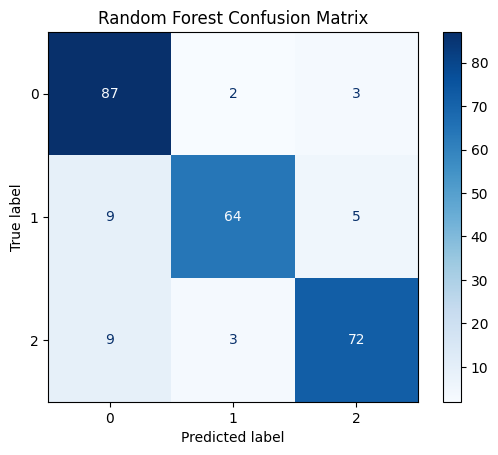

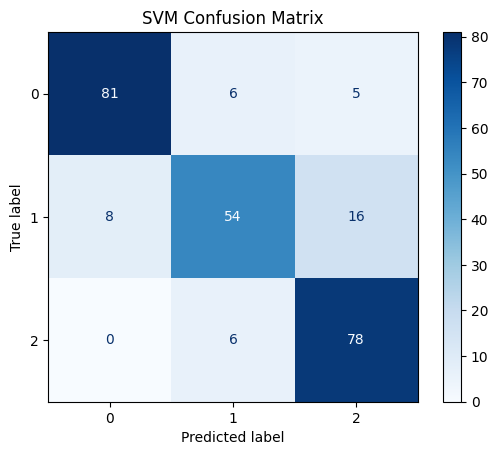

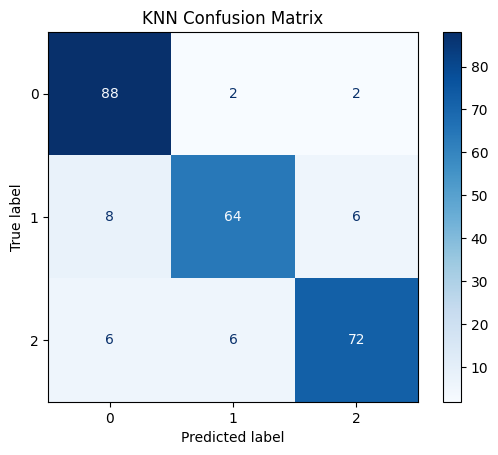

In [52]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# confusion matrix Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# confusion matrix SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# confusion matrix KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")